# Algorithmic Trading Strategy (Bollinger Bands)

## Before we start, let's go through the theory behind this strategy.

### The backing of this strategy revolves around the assumption that the prices of non-derivative assets will trade in a normal distribution. This means that when an asset price’s stock moves greater than 2 standard deviations away from its normal range, it can be considered an outlier that must be traded against.

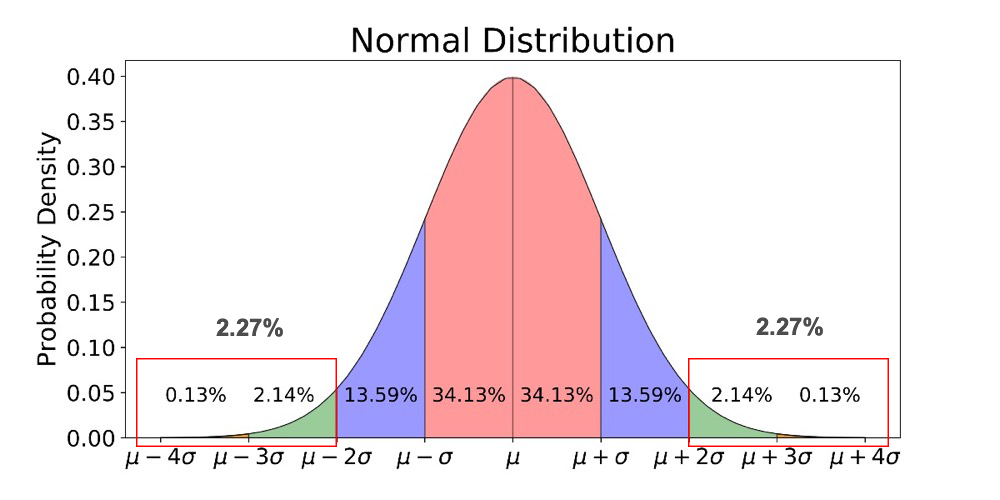

## For Example: If the standard deviation of the close price is larger than +2 , then you should Sell your stock and if the standard deviation of the close price is less than -2 , then you should Buy more.

# 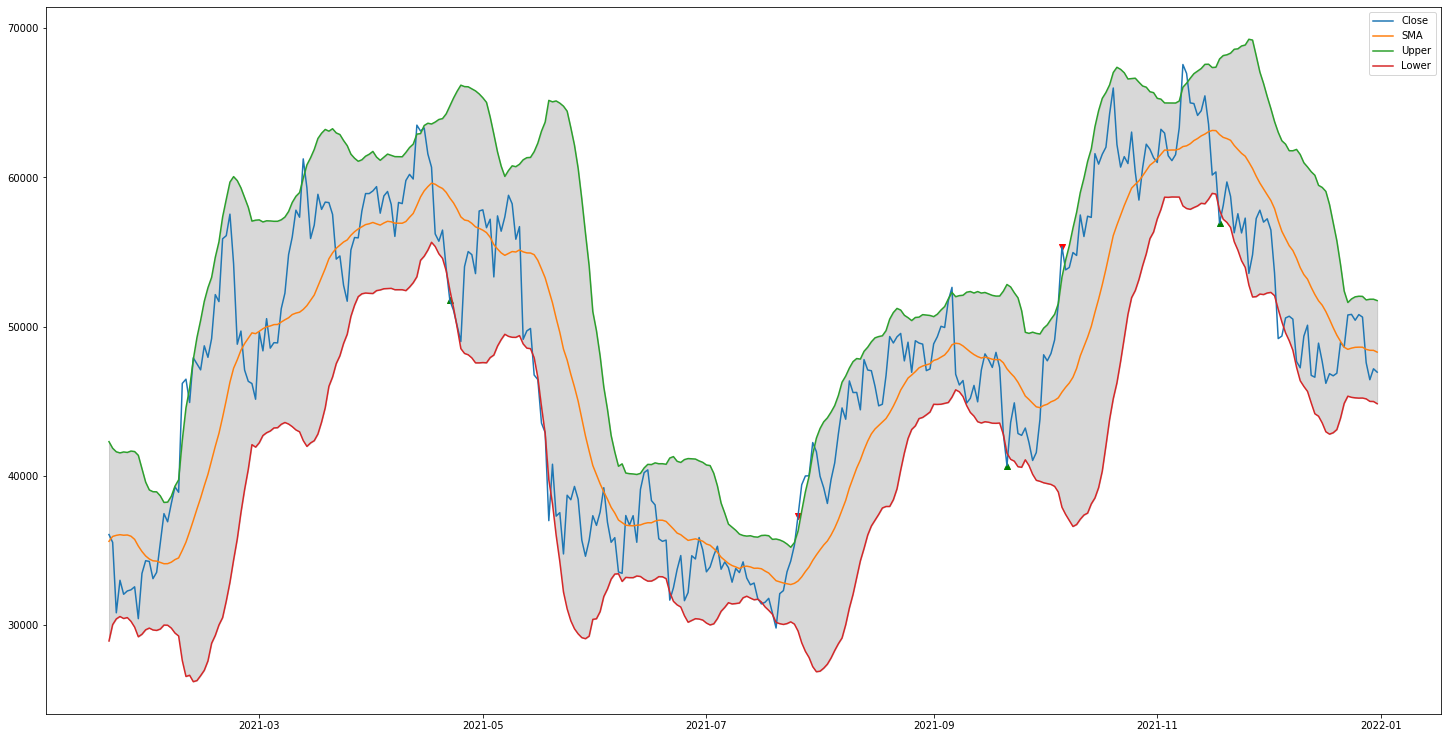

# -------------------------------------------------------------------------

# Bitcoin Price
## Get Bitcoin Data from yfinance (every day for 1 year)

In [14]:
import yfinance as yf
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

data = yf.download(tickers = ('btc-usd'), 
                   period = '1y', 
                   interval = '1d',
                   auto_adjust = True)
df = pd.DataFrame(data)
df


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2021-01-11,38346.531250,38346.531250,30549.599609,35566.656250,123320567399
2021-01-12,35516.359375,36568.527344,32697.976562,33922.960938,74773277909
2021-01-13,33915.121094,37599.960938,32584.667969,37316.359375,69364315979
2021-01-14,37325.109375,39966.406250,36868.562500,39187.328125,63615990033
2021-01-15,39156.707031,39577.710938,34659.589844,36825.367188,67760757881
...,...,...,...,...,...
2022-01-07,43153.570312,43153.570312,41077.445312,41557.902344,84196607520
2022-01-08,41561.464844,42228.941406,40672.277344,41733.941406,28066355845
2022-01-09,41734.726562,42663.949219,41338.160156,41911.601562,21294384372


In [15]:
## Simple Moving Average (SMA) for 20 days
df['SMA'] = df.Close.rolling(window=20).mean()

## standard deviations for 20 days
df['stddev'] = df.Close.rolling(window=20).std()

## Upper is 2 standard deviations above SMA and Lower is 2 standard deviations below SMA
df['Upper'] = df.SMA + 2 * df.stddev
df['Lower'] = df.SMA - 2 * df.stddev

## Generate the Buy_signal and Sell_signal based on the strategy
df['Buy_signal'] = np.where(df.Close < df.Lower, True, False)
df['Sell_signal'] = np.where(df.Close > df.Upper, True, False)

## Remove nan value
df = df.dropna()
df

,Open,High,Low,Close,Volume,SMA,stddev,Upper,Lower,Buy_signal,Sell_signal
Date,,,,,,,,,,,
2021-01-30,34295.933594,34834.707031,32940.187500,34269.523438,65141828798,34432.249902,2314.555634,39061.361169,29803.138635,False,False
2021-01-31,34270.878906,34288.332031,32270.175781,33114.359375,52754542671,34309.635059,2316.252162,38942.139383,29677.130734,False,False
2021-02-01,33114.578125,34638.214844,32384.228516,33537.175781,61400400660,34290.345801,2321.242776,38932.831353,29647.860249,False,False
2021-02-02,33533.199219,35896.882812,33489.218750,35510.289062,63088585433,34200.042285,2230.690256,38661.422798,29738.661772,False,False
2021-02-03,35510.820312,37480.187500,35443.984375,37472.089844,61166818159,34114.280371,2054.901386,38224.083144,30004.477599,False,False
...,...,...,...,...,...,...,...,...,...,...,...
2022-01-07,43153.570312,43153.570312,41077.445312,41557.902344,84196607520,47391.632031,2628.692036,52649.016104,42134.247958,True,False
2022-01-08,41561.464844,42228.941406,40672.277344,41733.941406,28066355845,47142.978320,2916.329749,52975.637818,41310.318823,False,False
2022-01-09,41734.726562,42663.949219,41338.160156,41911.601562,21294384372,46894.544531,3142.731873,53180.008277,40609.080785,False,False


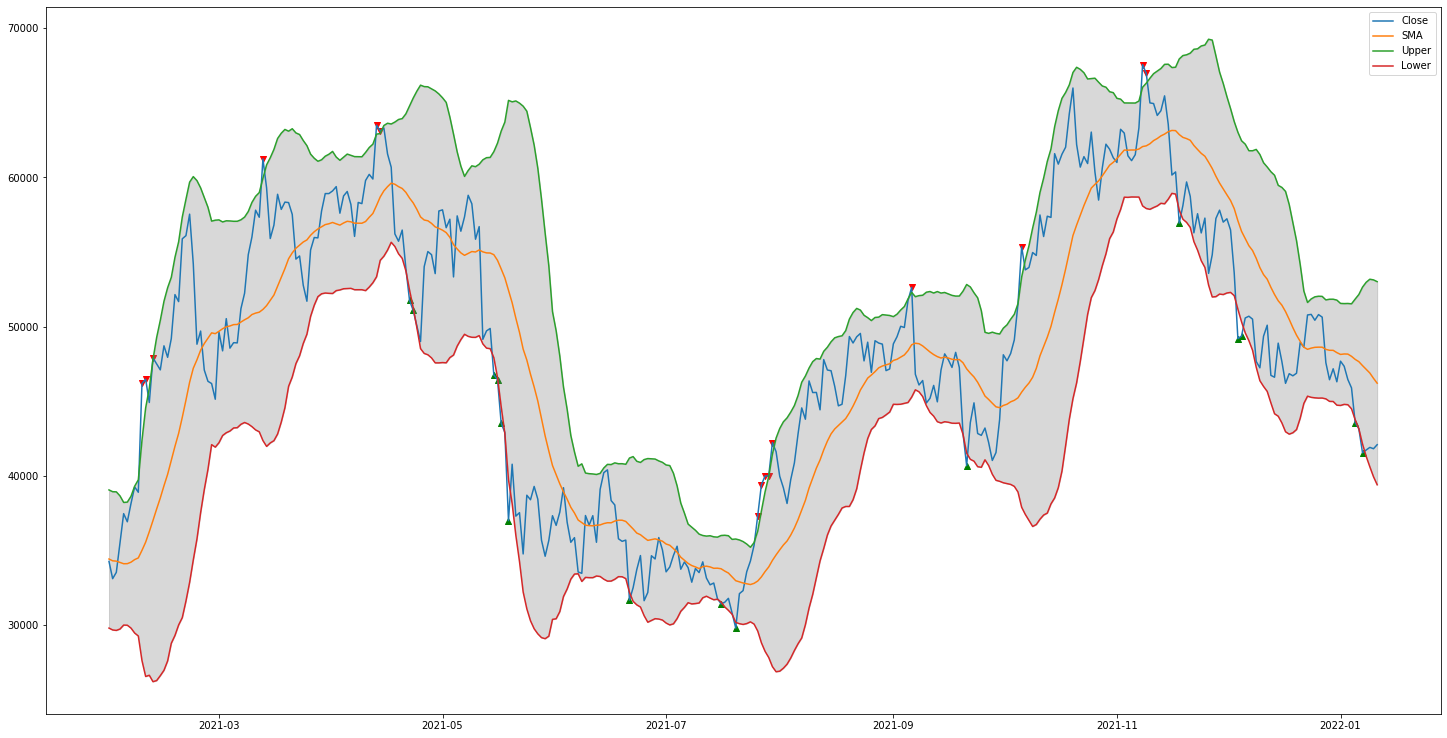

In [16]:
## plot figure size 
plt.figure(figsize= (25,13))

## plot 4 lines
plt.plot(df[['Close', 'SMA', 'Upper', 'Lower']])

## plot Buy and Sell scatter to our visualization
plt.scatter(df.index[df.Buy_signal], df[df.Buy_signal].Close, marker='^', color = 'g')
plt.scatter(df.index[df.Sell_signal], df[df.Sell_signal].Close, marker='v', color = 'r')

## Fill the middle area with grey color
plt.fill_between(df.index, df.Upper, df.Lower, color = 'grey', alpha = 0.3)

## show plot legend
plt.legend(['Close', 'SMA', 'Upper', 'Lower'])

## show plot
plt.show()

# Improve our buy and sell signal (Buy 1 Sell 1)

In [17]:
## Define new lists and stock_on_hand

buy = []
sell = []
stock_on_hand = False

## change multiple buy and sell to only 1 buy and 1 sell

for i in range(len(df)):
    if df.Close[i] < df.Lower[i]:
        if stock_on_hand == False:
            buy.append(i)
            stock_on_hand = True
    elif df.Close[i] > df.Upper[i]:
        if stock_on_hand == True:
            sell.append(i)
            stock_on_hand = False

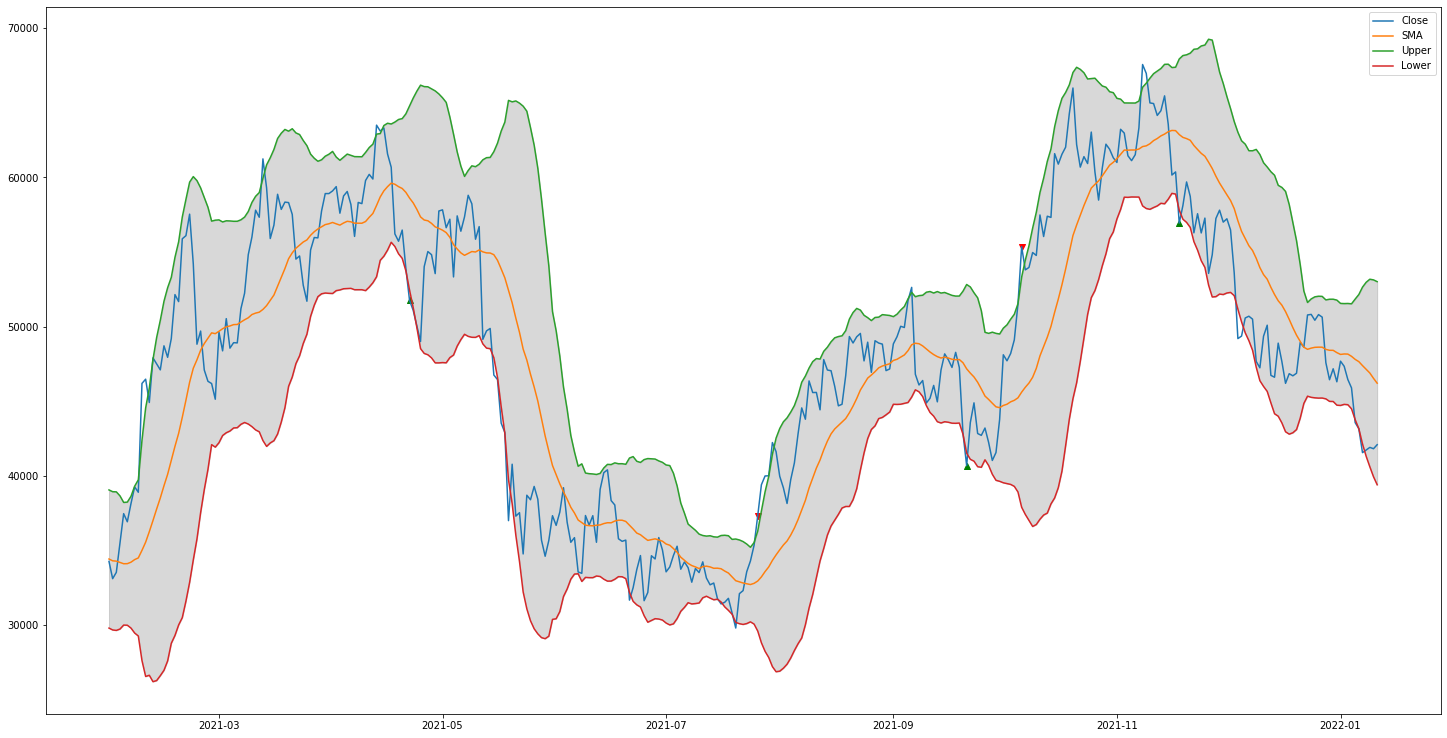

In [18]:
## plot figure size 
plt.figure(figsize= (25,13))

## plot 4 lines
plt.plot(df[['Close', 'SMA', 'Upper', 'Lower']])

## plot Buy and Sell scatter to our visualization
plt.scatter(df.iloc[buy].index, df.iloc[buy].Close, marker='^', color = 'g')
plt.scatter(df.iloc[sell].index, df.iloc[sell].Close, marker='v', color = 'r')

## Fill the middle area with grey color
plt.fill_between(df.index, df.Upper, df.Lower, color = 'grey', alpha = 0.3)

## show plot legend
plt.legend(['Close', 'SMA', 'Upper', 'Lower'])

## show plot
plt.show()

# Check if you can make profit based on this strategy

In [19]:
share = 1000
profit = 0

for i in range(len(sell)):
    
    profit = profit - (df.iloc[buy[i]].Close * share)
    profit = profit + (df.iloc[sell[i]].Close * share)
    
profit

243035.15625